<a href="https://colab.research.google.com/github/VarhanKusuma/Perbandingan_K-NN_dan_NBC_Pada_Sentimen_Ulasan_Aplikasi_Intermittent_Fasting/blob/main/SKRIPSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Import library

# Mengimport modul files dari Google Colab untuk mengunggah dan men-download file
from google.colab import files

# Mengimport modul pandas sebagai pd untuk manipulasi data tabular
import pandas as pd

# Mengimport modul io untuk memanipulasi data input dan output
import io

# Mengimport modul nltk untuk pemrosesan bahasa alami
import nltk

# Mengimport korpus stopwords dari modul nltk untuk menghapus kata-kata yang tidak relevan
from nltk.corpus import stopwords

# Tokenisasi kata untuk membagi teks menjadi token kata
from nltk.tokenize import word_tokenize

# Mengimport korpus WordNet dari modul nltk untuk digunakan dalam proses lemmatisasi
from nltk.corpus import wordnet

# Mengimpor kelas WordNetLemmatizer dari modul stem dari nltk untuk melakukan lemmatisasi kata
from nltk.stem import WordNetLemmatizer

# Melakukan operasi pencarian dan manipulasi string menggunakan ekspresi reguler
import re

# Mengimport NumPy, sebuah library yang menyediakan dukungan untuk array dan matriks multidimensi serta berbagai fungsi matematika
import numpy as np

# Mengimport kelas TfidfVectorizer dari modul sklearn.feature_extraction.text untuk mengonversi teks menjadi vektor fitur dengan pembobotan TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Mengimport fungsi train_test_split dari modul sklearn.model_selection untuk membagi data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split

# Mengimport kelas MultinomialNB dari modul sklearn.naive_bayes untuk menerapkan algoritma Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Mengimport kelas KNeighborsClassifier dari modul sklearn.neighbors untuk menerapkan algoritma K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Mengimport fungsi accuracy_score dan classification_report dari modul sklearn.metrics untuk mengevaluasi kinerja model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Mengimport fungsi classification_report dan confusion_matrix dari modul sklearn.metrics untuk mengevaluasi kinerja model klasifikasi.
from sklearn.metrics import classification_report, confusion_matrix

# Mengimport kelas cross_val_score untuk membagi data menjadi beberapa lipatan (folds), melatih model pada setiap lipatan, dan kemudian menghitung skor kinerja model untuk setiap lipatan.
from sklearn.model_selection import cross_val_score

# Mengimport kelas StratifiedKFold memastikan bahwa setiap lipatan mempertahankan proporsi kelas yang sama seperti yang ada dalam set data asli
from sklearn.model_selection import StratifiedKFold

# Mengimport modul matplotlib.pyplot sebagai plt untuk visualisasi data
import matplotlib.pyplot as plt

# Mengimport modul matplotlib untuk membuat legenda dengan warna yang sesuai
import matplotlib.patches as mpatches

# Mengimport modul seaborn sebagai sns untuk visualisasi data yang lebih menarik
import seaborn as sns

# Mengimport kelas tabulate untuk mencetak tabel dari berbagai jenis data, seperti list, dictionary, atau DataFrame, dengan format yang rapi dan mudah dibaca.
from tabulate import tabulate

# Mengimport kelas WordCloud dari modul wordcloud untuk membuat word cloud dari teks.
from wordcloud import WordCloud

from sklearn.ensemble import VotingClassifier

In [2]:
# @title Download Resources

# Berisi model untuk tokenisasi, yang digunakan untuk memisahkan teks menjadi token atau kata-kata individual.
nltk.download('punkt')

# Berisi daftar stopwords bahasa Inggris yang umumnya dihapus dari teks selama tahap pembersihan.
nltk.download('stopwords')

# Sumber daya leksikal bahasa Inggris yang menyimpan hubungan antara kata-kata, seperti sinonim, antonim, dan hubungan semantik lainnya.
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# @title Membaca Dataset CSV & Total Baris Data

dataset = pd.read_csv('Fasting.csv')

# Hitung total baris
total_rows = len(dataset)

print("Total baris dalam file CSV:", total_rows)

Total baris dalam file CSV: 1050


In [4]:
# @title Membersihkan Dataset (Case Folding)

def case_fold(text):
    # Case Folding: Ubah teks menjadi huruf kecil
    return text.lower()

# Melakukan case folding pada kolom 'Comments' dari dataset
dataset['Case Folded Comments'] = dataset['Comments'].apply(case_fold)

# Menampilkan dataset setelah melakukan case folding
dataset[['Comments', 'Case Folded Comments']].head()

,Comments,Case Folded Comments
0,This app keeps track of when yofasting and whe...,this app keeps track of when yofasting and whe...
1,This seems to be far too ridgid for practical ...,this seems to be far too ridgid for practical ...
2,"Love this app overall, but I feel it can use s...","love this app overall, but i feel it can use s..."
3,i really wanted to get fit so i downloaded som...,i really wanted to get fit so i downloaded som...
4,I believe its a good app i will get it on my p...,i believe its a good app i will get it on my p...


In [5]:
# @title Membersihkan Dataset (Filtering)

def filter_text(text):
    # Filtering: Hapus karakter non-alfanumerik dan tanda baca
    return re.sub(r'[^a-zA-Z\s]', '', text)

# Melakukan filtering pada kolom 'Case Folded Comments' dari dataset
dataset['Filtered Comments'] = dataset['Case Folded Comments'].apply(filter_text)

# Menampilkan dataset setelah melakukan filtering
dataset[['Case Folded Comments', 'Filtered Comments']].head()

,Case Folded Comments,Filtered Comments
0,this app keeps track of when yofasting and whe...,this app keeps track of when yofasting and whe...
1,this seems to be far too ridgid for practical ...,this seems to be far too ridgid for practical ...
2,"love this app overall, but i feel it can use s...",love this app overall but i feel it can use so...
3,i really wanted to get fit so i downloaded som...,i really wanted to get fit so i downloaded som...
4,i believe its a good app i will get it on my p...,i believe its a good app i will get it on my p...


In [6]:
# @title Membersihkan Dataset (Tokenisasi)

def tokenize_text(text):
    # Tokenisasi: Memisahkan teks menjadi kata-kata individual
    return word_tokenize(text)

# Melakukan tokenisasi pada kolom 'Comments' dari dataset
dataset['Tokenized Comments'] = dataset['Filtered Comments'].apply(tokenize_text)

# Menampilkan dataset setelah melakukan tokenisasi
dataset[['Filtered Comments', 'Tokenized Comments']].head()

,Filtered Comments,Tokenized Comments
0,this app keeps track of when yofasting and whe...,"[this, app, keeps, track, of, when, yofasting,..."
1,this seems to be far too ridgid for practical ...,"[this, seems, to, be, far, too, ridgid, for, p..."
2,love this app overall but i feel it can use so...,"[love, this, app, overall, but, i, feel, it, c..."
3,i really wanted to get fit so i downloaded som...,"[i, really, wanted, to, get, fit, so, i, downl..."
4,i believe its a good app i will get it on my p...,"[i, believe, its, a, good, app, i, will, get, ..."


In [7]:
# @title Membersihkan Dataset (Stopwords Removal)

def remove_stopwords(tokens):
    # Hapus stopwords bahasa Inggris
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

# Melakukan penghapusan stop words pada kolom 'Tokenized Comments' dari dataset
dataset['Comments(Without Stopwords)'] = dataset['Tokenized Comments'].apply(remove_stopwords)

# Menampilkan dataset setelah menghapus stop words
dataset[['Tokenized Comments', 'Comments(Without Stopwords)']].head()

,Tokenized Comments,Comments(Without Stopwords)
0,"[this, app, keeps, track, of, when, yofasting,...","[app, keeps, track, yofasting, fasting, also, ..."
1,"[this, seems, to, be, far, too, ridgid, for, p...","[seems, far, ridgid, practical, use, started, ..."
2,"[love, this, app, overall, but, i, feel, it, c...","[love, app, overall, feel, use, improvments, l..."
3,"[i, really, wanted, to, get, fit, so, i, downl...","[really, wanted, get, fit, downloaded, apps, o..."
4,"[i, believe, its, a, good, app, i, will, get, ...","[believe, good, app, get, phone, im, giving, s..."


In [8]:
# @title Membersihkan Dataset (Lemmatization)

def apply_lemmatization(tokens):
    # Menerapkan lemmatisasi menggunakan WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]

# Melakukan lemmatisasi pada kolom 'Comments(Without Stopwords)' dari dataset
dataset['Lemmatized Comments'] = dataset['Comments(Without Stopwords)'].apply(apply_lemmatization)

# Menampilkan dataset setelah lemmatisasi
dataset[['Comments(Without Stopwords)', 'Lemmatized Comments']].head()

,Comments(Without Stopwords),Lemmatized Comments
0,"[app, keeps, track, yofasting, fasting, also, ...","[app, keep, track, yofasting, fasting, also, t..."
1,"[seems, far, ridgid, practical, use, started, ...","[seems, far, ridgid, practical, use, started, ..."
2,"[love, app, overall, feel, use, improvments, l...","[love, app, overall, feel, use, improvments, l..."
3,"[really, wanted, get, fit, downloaded, apps, o...","[really, wanted, get, fit, downloaded, apps, o..."
4,"[believe, good, app, get, phone, im, giving, s...","[believe, good, app, get, phone, im, giving, s..."


In [9]:
# @title Hasil dari Dataset Yang Sudah Dibersihkan (Cleaning)

def clean_text(text):

    # Case Folding: Ubah teks menjadi huruf kecil
    text = text.lower()

    # Filtering: Hapus karakter non-alfabet dan tanda baca, serta angka
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenisasi: Memisahkan teks menjadi kata-kata individual
    tokens = word_tokenize(text)

    # Stopwords Removal: Hapus stopwords bahasa Inggris
    stop_words = set(stopwords.words('english'))
    # Menambahkan kata-kata tambahan secara manual
    additional_stopwords = {'app', 'fast', 'time', 'use', 'would', 'im', 'get', 'start', 'track', 'day', 'one', 'way', 'need', 'open', 'ad', 'hour', 'edit',
                            'ive', 'also', 'weight', 'using', 'even','many', 'version', 'water', 'much', 'times', 'fasting', 'every', 'give', 'option', 'week',
                            'see', 'plan', 'end', 'days', 'eating', 'set', 'back', 'could', 'apps', 'still', 'far', 'go', 'used', 'find', 'phone', 'timer',
                            'body', 'long', 'notifications', 'going', 'started', 'make', 'add', 'plans', 'first', 'another', 'stars', 'work', 'eat', 'youre',
                            'hours', 'data', 'without', 'try', 'tracking', 'custom', 'longer', 'lost', 'drink', 'months', 'though', 'tried', 'little', 'money',
                            'theres', 'month', 'however', 'intermittent', 'know', 'tracker', 'getting', 'since', 'think', 'makes', 'manually', 'got', 'food',
                            'options', 'google', 'seems', 'thing', 'fasts', 'something', 'feel', 'lot', 'year', 'allow', 'wanted', 'always', 'meal', 'instead'}

    # Gabungkan daftar stopwords dengan kata-kata tambahan
    stop_words.update(additional_stopwords)
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization: Mengubah kata-kata ke bentuk dasarnya
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens]

    # Hapus redundansi kata-kata yang sama
    tokens = list(set(tokens))

    # Gabungkan token kembali menjadi teks
    clean_text = ' '.join(tokens)

    return clean_text

# Melakukan pembersihan teks pada kolom 'Comments' dari dataset
dataset['Comments(Cleaning)'] = dataset['Comments'].apply(clean_text)

# Menampilkan dataset 'Comments' asli dan yang sudah dibersihkan
dataset[['Comments', 'Comments(Cleaning)']].head()

,Comments,Comments(Cleaning)
0,This app keeps track of when yofasting and whe...,love free future keep yofasting start progress...
1,This seems to be far too ridgid for practical ...,pm badly moment flexible dont enter didnt actu...
2,"Love this app overall, but I feel it can use s...",love across improvments devices like sync keep...
3,i really wanted to get fit so i downloaded som...,nore suposed dosent download didnt eat remembe...
4,I believe its a good app i will get it on my p...,star bc tmmrw give kinda good trust rev health...


In [10]:
# @title Menambah Kolom Sentiment dari Hasil Rating

def label_sentiment(rating):
    if rating in [1, 2]:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    elif rating in [4, 5]:
        return 'positive'

# Membuat kolom baru 'Sentiment' yang berisi label sentimen berdasarkan nilai rating
dataset['Sentiment'] = dataset['Rating'].apply(label_sentiment)

# Menampilkan lima baris pertama dataset untuk memeriksa hasilnya
dataset[['Comments(Cleaning)','Sentiment','Rating']].head()

,Comments(Cleaning),Sentiment,Rating
0,love free future keep yofasting start progress...,positive,5
1,pm badly moment flexible dont enter didnt actu...,negative,1
2,love across improvments devices like sync keep...,neutral,3
3,nore suposed dosent download didnt eat remembe...,neutral,3
4,star bc tmmrw give kinda good trust rev health...,positive,5


In [11]:
# @title  Term Frequency-Inverse Document Frequency (TF-IDF)

# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Menerapkan TF-IDF Vectorizer pada data komentar yang sudah bersih
X_tfidf = tfidf_vectorizer.fit_transform(dataset['Comments(Cleaning)'])

# Mendapatkan daftar fitur dari TF-IDF Vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Ubah matriks TF-IDF menjadi array numpy
tfidf_array = X_tfidf.toarray()

# Buat DataFrame dari matriks TF-IDF
tfidf_df = pd.DataFrame(tfidf_array, columns=feature_names)

In [12]:
# @title Tabel Sampel Hasil Pembobotan TF-IDF (5 Kata Teratas)

# Fungsi untuk mengurutkan nilai dalam setiap kolom dari besar ke kecil
sorted_tfidf_df = tfidf_df.apply(lambda x: x.sort_values(ascending=False).values)

# Ambil hanya 5 kata teratas dari setiap kolom
top_5_words = sorted_tfidf_df.iloc[:, :5]

# Tampilkan lima baris pertama dari DataFrame yang diurutkan
print("Tabel untuk Sampel Hasil Pembobotan dengan TF-IDF :")
print(tabulate(top_5_words.head(), headers='keys', tablefmt='pretty'))

Tabel untuk Sampel Hasil Pembobotan dengan TF-IDF :
+---+---------------------+--------------------+---------------------+---------------------+--------------------+
|   |       ability       |      abismal       |        abit         |        able         |       abort        |
+---+---------------------+--------------------+---------------------+---------------------+--------------------+
| 0 | 0.31743722532384205 | 0.3196088730995249 | 0.23226981279268172 | 0.46370483127730017 | 0.3188880138293285 |
| 1 | 0.2912597486067642  |        0.0         |         0.0         | 0.40568377190893706 | 0.3073165609099716 |
| 2 | 0.25811232963435726 |        0.0         |         0.0         | 0.3285556659793162  |        0.0         |
| 3 | 0.23884478967438896 |        0.0         |         0.0         | 0.30708265992138206 |        0.0         |
| 4 | 0.22916408923007664 |        0.0         |         0.0         | 0.3004073021919128  |        0.0         |
+---+---------------------+---------

In [13]:
# @title Data Latih dan Data Uji dengan Perbandingan 80:20

# Bagi data menjadi data latih dan data uji untuk TF-IDF Vectorizer
X_tfidf_train, X_tfidf_test, y_train, y_test = train_test_split(X_tfidf, dataset['Sentiment'], test_size=0.2, random_state=42)

In [14]:
# @title K-Nearest Neighbors (KNN) TfidfVectorizer

# Inisialisasi model K-Nearest Neighbors (KNN) dengan jumlah tetangga (k) = 5
tfidf_classifier = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN menggunakan data latih untuk TF-IDF Vectorizer
tfidf_classifier.fit(X_tfidf_train, y_train)

# Melakukan prediksi menggunakan data uji
y_tfidf_knn = tfidf_classifier.predict(X_tfidf_test)

# Menghitung matriks (confusion matrix)
cm = confusion_matrix(y_test, y_tfidf_knn)


Evaluation for TF-IDF Vectorizer:
              precision    recall  f1-score   support

    negative       0.68      0.68      0.68        77
     neutral       0.42      0.37      0.39        67
    positive       0.66      0.74      0.70        66

    accuracy                           0.60       210
   macro avg       0.59      0.60      0.59       210
weighted avg       0.59      0.60      0.59       210

Accuracy: 60%


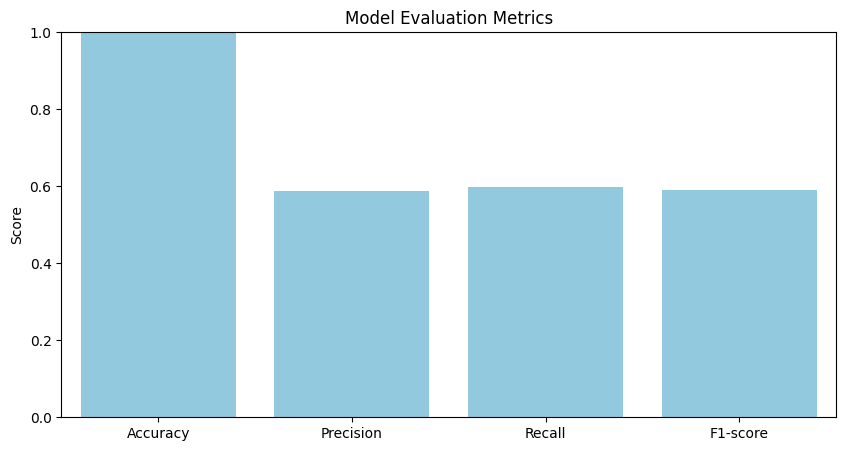

In [15]:
# @title Model Evaluation Metrics K-Nearest Neighbors (KNN)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_tfidf_knn)
# Konversi ke persentase
rounded_accuracy_knn = round(accuracy * 100)
# Menghitung presisi model dengan menangani zero division
precision_knn = precision_score(y_test, y_tfidf_knn, average='macro', zero_division=0)
# Menghitung recall model dengan menangani zero division
recall_knn = recall_score(y_test, y_tfidf_knn, average='macro', zero_division=0)
# Menghitung F1-score model
f1_knn = f1_score(y_test, y_tfidf_knn, average='macro', zero_division=0)

# Evaluasi model untuk TF-IDF Vectorizer
print("\nEvaluation for TF-IDF Vectorizer:")
print(classification_report(y_test, y_tfidf_knn))

# Menampilkan persentase akurasi
print(f"Accuracy: {rounded_accuracy_knn}%")

# Visualisasi akurasi, presisi, recall, dan f1-score
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
values = [rounded_accuracy_knn, precision_knn, recall_knn, f1_knn]

plt.figure(figsize=(10, 5))
sns.barplot(x=metrics, y=values, color="skyblue")
plt.title("Model Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)  # Memastikan sumbu y berada dalam rentang 0-1 untuk nilai persentase
plt.show()

Accuracy (Confusion Matrix): 60.00%


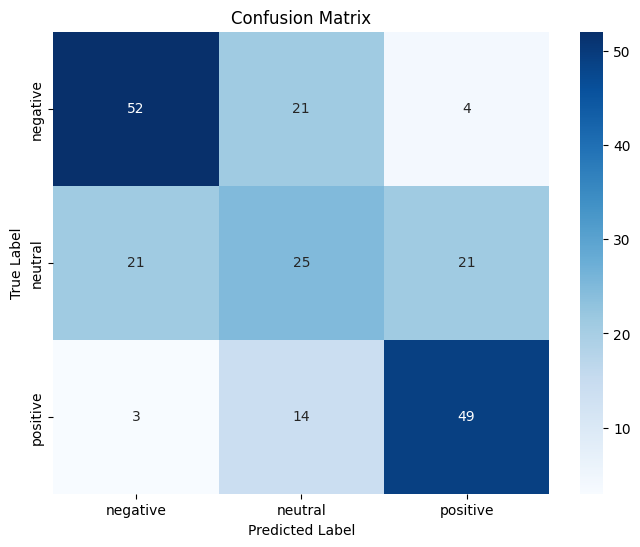

In [16]:
# @title Model Confusion Matrix K-Nearest Neighbors (KNN)

# Menghitung akurasi dari confusion matrix
total_samples = np.sum(cm)
correct_predictions = np.trace(cm)
accuracy_from_cm = correct_predictions / total_samples

# Menghitung akurasi dari confusion matrix dalam persentase
accuracy_from_cm_percent = accuracy_from_cm * 100

# Menampilkan akurasi dari confusion matrix
print(f"Accuracy (Confusion Matrix): {accuracy_from_cm_percent:.2f}%")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=tfidf_classifier.classes_, yticklabels=tfidf_classifier.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [17]:
# @title Model Naive Bayes Multinomial (NBC) TfidfVectorizer

# Inisialisasi model Naive Bayes Multinomial untuk TF-IDF Vectorizer
tfidf_classifier = MultinomialNB()

# Melatih model menggunakan data latih untuk TF-IDF Vectorizer
tfidf_classifier.fit(X_tfidf_train, y_train)

# Lakukan prediksi menggunakan data uji untuk TF-IDF Vectorizer
y_tfidf_nbc = tfidf_classifier.predict(X_tfidf_test)

# Menghitung matriks (confusion matrix)
cm = confusion_matrix(y_test, y_tfidf_nbc)


Evaluation for TF-IDF Vectorizer:
              precision    recall  f1-score   support

    negative       0.79      0.77      0.78        77
     neutral       0.66      0.46      0.54        67
    positive       0.69      0.92      0.79        66

    accuracy                           0.72       210
   macro avg       0.71      0.72      0.70       210
weighted avg       0.72      0.72      0.71       210

Accuracy: 72%


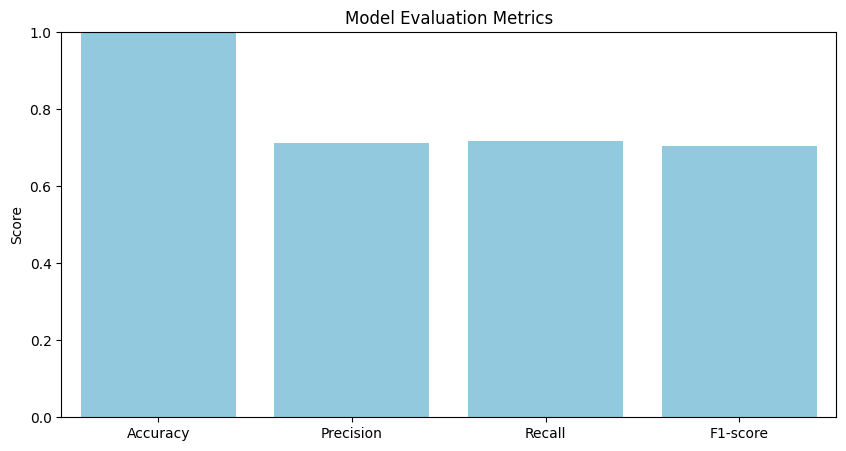

In [18]:
# @title Model Evaluation Metrics Naive Bayes Multinomial (NBC)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_tfidf_nbc)
# Konversi ke persentase
rounded_accuracy_nbc = round(accuracy * 100)
# Menghitung presisi model dengan menangani zero division
precision_nbc = precision_score(y_test, y_tfidf_nbc, average='macro', zero_division=0)
# Menghitung recall model dengan menangani zero division
recall_nbc = recall_score(y_test, y_tfidf_nbc, average='macro', zero_division=0)
# Menghitung F1-score model
f1_nbc = f1_score(y_test, y_tfidf_nbc, average='macro')

# Evaluasi model untuk TF-IDF Vectorizer
print("\nEvaluation for TF-IDF Vectorizer:")
print(classification_report(y_test, y_tfidf_nbc))

# Menampilkan persentase akurasi
print(f"Accuracy: {rounded_accuracy_nbc}%")

# Visualisasi akurasi, presisi, recall, dan f1-score
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
values = [rounded_accuracy_nbc, precision_nbc, recall_nbc, f1_nbc]

plt.figure(figsize=(10, 5))
sns.barplot(x=metrics, y=values, color="skyblue")
plt.title("Model Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)  # Memastikan sumbu y berada dalam rentang 0-1 untuk nilai persentase
plt.show()

Accuracy (Confusion Matrix): 71.90%


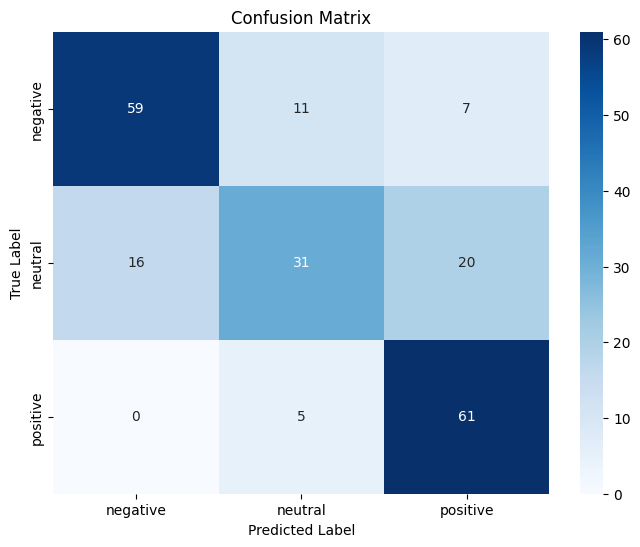

In [19]:
# @title Model Confusion Matrix  Naive Bayes Multinomial (NBC)

# Menghitung akurasi dari confusion matrix
total_samples = np.sum(cm)
correct_predictions = np.trace(cm)
accuracy_from_cm = correct_predictions / total_samples

# Menghitung akurasi dari confusion matrix dalam persentase
accuracy_from_cm_percent = accuracy_from_cm * 100

# Menampilkan akurasi dari confusion matrix
print(f"Accuracy (Confusion Matrix): {accuracy_from_cm_percent:.2f}%")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=tfidf_classifier.classes_, yticklabels=tfidf_classifier.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

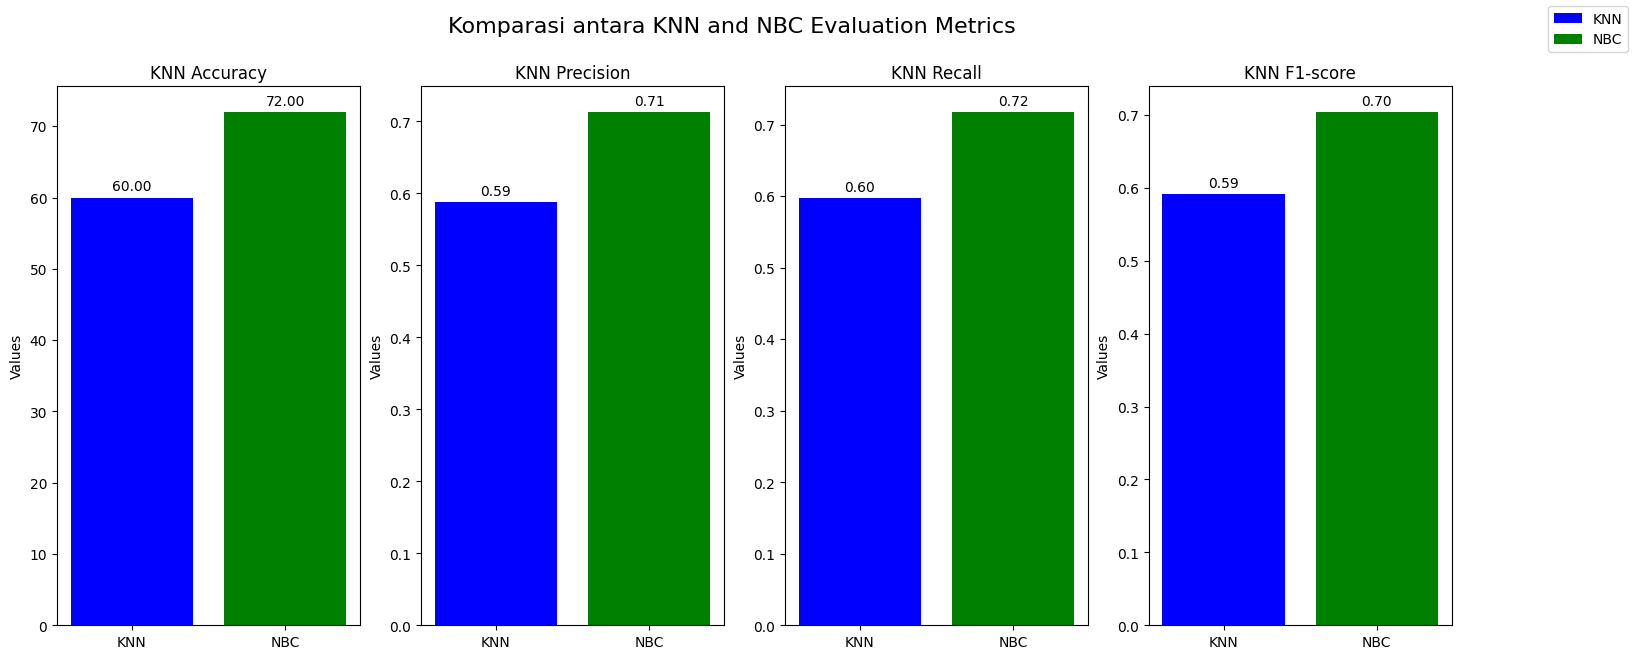

In [20]:
# @title Komparasi antara KNN and NBC Evaluation Metrics
# Metrik dan nilai untuk KNN
knn_metrics = ["KNN Accuracy", "KNN Precision", "KNN Recall", "KNN F1-score"]
knn_values = [rounded_accuracy_knn, precision_knn, recall_knn, f1_knn]

# Metrik dan nilai untuk NBC
nbc_metrics = ["NBC Accuracy", "NBC Precision", "NBC Recall", "NBC F1-score"]
nbc_values = [rounded_accuracy_nbc, precision_nbc, recall_nbc, f1_nbc]

# Jumlah subplot yang akan dibuat
num_metrics = len(knn_metrics)

# Plotting
fig, axs = plt.subplots(1, num_metrics, figsize=(18, 7))  # Buat subplot

# Loop melalui setiap metrik untuk membuat subplot
for i in range(num_metrics):
    # Plot untuk KNN
    axs[i].bar('KNN', knn_values[i], color='blue', label='KNN')
    # Plot untuk NBC
    axs[i].bar('NBC', nbc_values[i], color='green', label='NBC')

    # Atur judul subplot
    axs[i].set_title(knn_metrics[i])

    # Atur label di sumbu y
    axs[i].set_ylabel('Values')

    # Tambahkan nilai numerik di atas setiap bar
    for bar in axs[i].patches:
        axs[i].annotate(format(bar.get_height(), '.2f'),
                        (bar.get_x() + bar.get_width() / 2,
                         bar.get_height()), ha='center', va='center',
                        size=10, xytext=(0, 8),
                        textcoords='offset points')

# Tampilkan legenda
fig.legend(['KNN', 'NBC'], loc='upper right')

# Tampilkan plot
plt.suptitle('Komparasi antara KNN and NBC Evaluation Metrics', fontsize=16)
plt.show()

In [21]:
# @title Model K-Fold Cross Validation 10-Fold K-NN & NBC

# Inisialisasi model KNN dengan jumlah tetangga (k) = 3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Inisialisasi model NBC
nb_classifier = MultinomialNB()

# Inisialisasi K-Fold Cross Validation dengan 10-Fold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Melakukan K-Fold Cross Validation untuk KNN
cv_results_knn = cross_val_score(knn_classifier, X_tfidf, dataset['Sentiment'], cv=kfold, scoring='accuracy')

# Melakukan K-Fold Cross Validation untuk NBC
cv_results_nb = cross_val_score(nb_classifier, X_tfidf, dataset['Sentiment'], cv=kfold, scoring='accuracy')

KNN Accuracy: 55.14% (+/- 0.06%)
NBC Accuracy: 70.76% (+/- 0.09%)


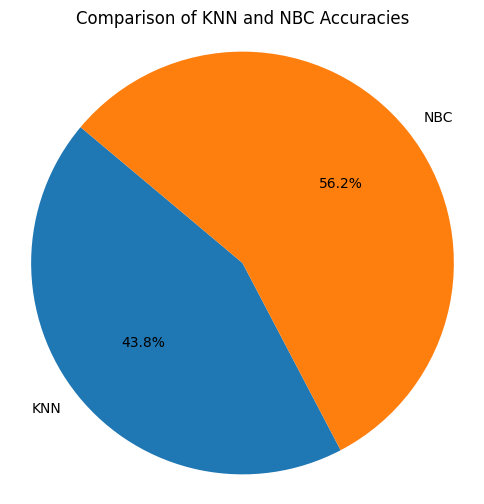

In [22]:
# @title  Perbandingan Accuracy Model K-Fold Cross Validation

# Rata-rata dan simpangan baku untuk KNN
knn_mean_accuracy = cv_results_knn.mean() * 100
knn_std_accuracy = cv_results_knn.std() * 2

# Rata-rata dan simpangan baku untuk NBC
nb_mean_accuracy = cv_results_nb.mean() * 100
nb_std_accuracy = cv_results_nb.std() * 2

# Menampilkan hasil cross-validation untuk KNN dan NBC
print("KNN Accuracy: %.2f%% (+/- %.2f%%)" % (knn_mean_accuracy, knn_std_accuracy))
print("NBC Accuracy: %.2f%% (+/- %.2f%%)" % (nb_mean_accuracy, nb_std_accuracy))

# Data untuk diagram lingkaran
data = [knn_mean_accuracy, nb_mean_accuracy]

# Label untuk setiap bagian diagram lingkaran
labels = ['KNN', 'NBC']

# Warna untuk setiap bagian diagram lingkaran
colors = ['#1f77b4', '#ff7f0e']

# Membuat diagram lingkaran
plt.figure(figsize=(6, 6))
sns.set_palette("pastel")  # Menentukan palet warna
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Comparison of KNN and NBC Accuracies')  # Judul diagram
plt.axis('equal')  # Memastikan diagram lingkaran berbentuk lingkaran
plt.show()

In [23]:
# @title Word Cloud

# memisahkan dataset berdasarkan sentimen
positive_comments = dataset.loc[dataset['Sentiment'] == 'positive', 'Comments(Cleaning)'].str.cat(sep=' ')
neutral_comments = dataset.loc[dataset['Sentiment'] == 'neutral', 'Comments(Cleaning)'].str.cat(sep=' ')
negative_comments = dataset.loc[dataset['Sentiment'] == 'negative', 'Comments(Cleaning)'].str.cat(sep=' ')

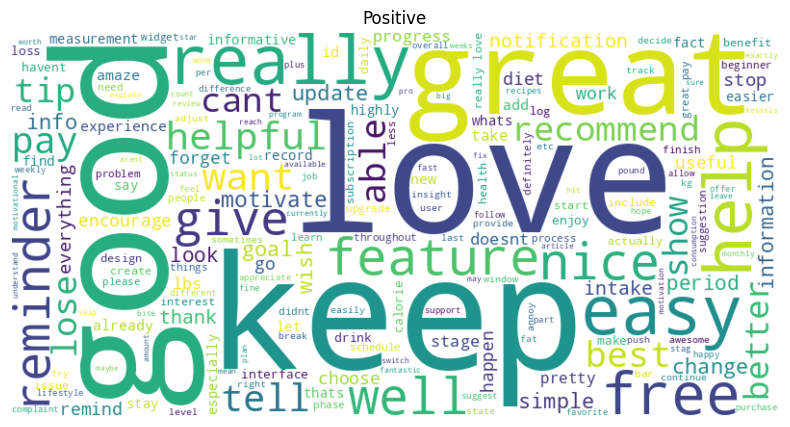

In [24]:
# @title Word Cloud (Positive)

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_comments)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive')
plt.show()

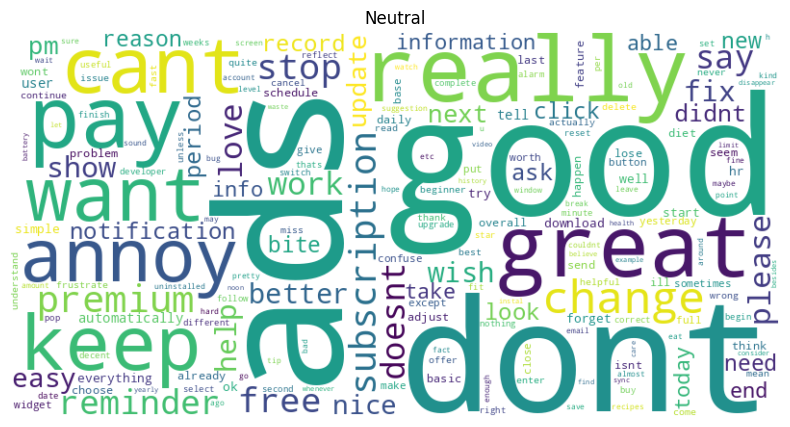

In [25]:
# @title Word Cloud (Neutral)

wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_comments)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral')
plt.show()

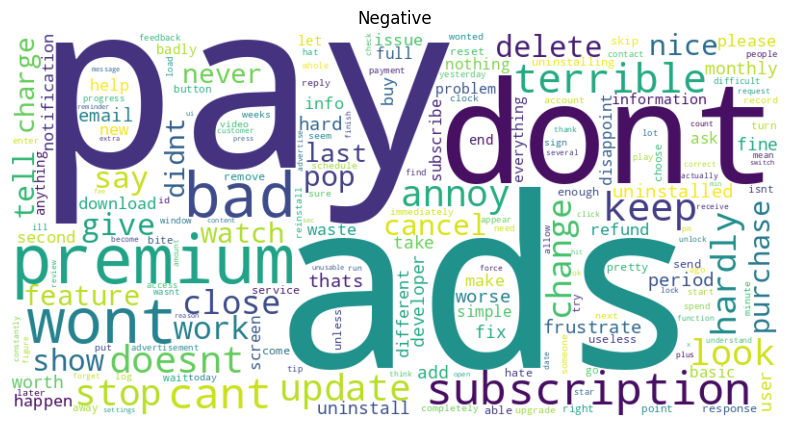

In [26]:
# @title Word Cloud (Negative)

wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_comments)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative')
plt.show()

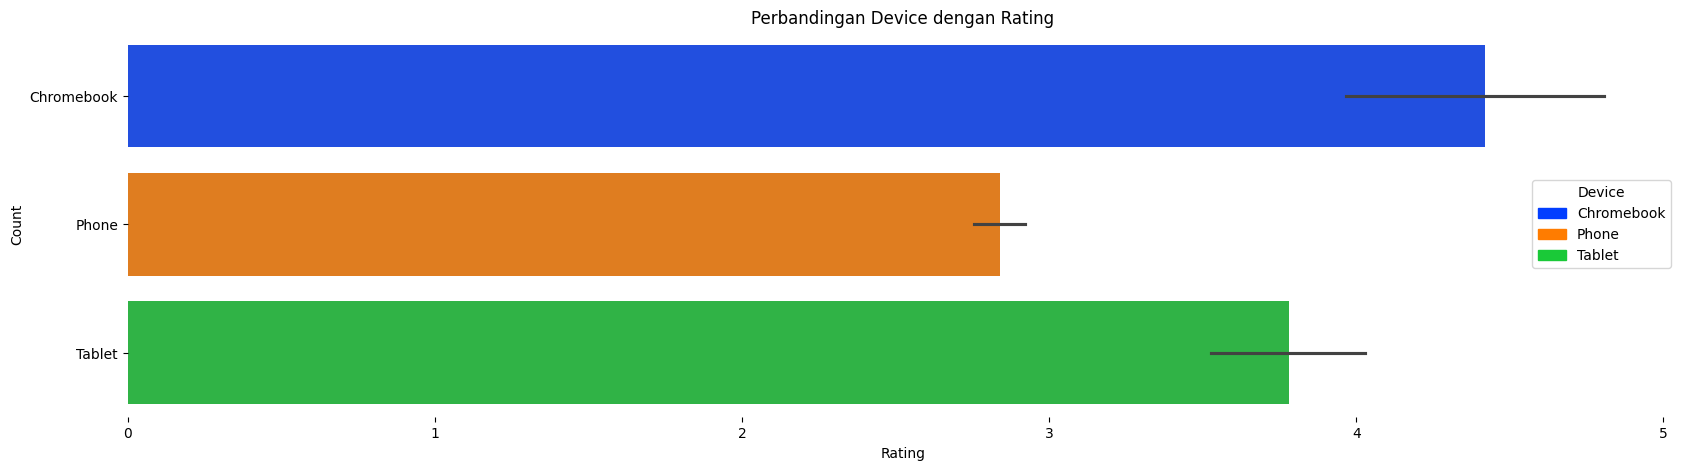

In [29]:
# @title Perbandingan antara Device dan Rating

# Membuat sebuah figur dengan ukuran yang telah ditentukan sebelumnya menggunakan plt.figure()
fig, ax = plt.subplots(figsize=(20, 5))

# Menggambar plot jenis bar
sns.barplot(data=dataset, x='Rating', y='Device', hue='Device', palette='bright', ax=ax)

# Menghapus batas atas, kanan, bawah, dan kiri dari sumbu plot
sns.despine(ax=ax, top=True, right=True, bottom=True, left=True)

# Menambahkan judul plot
ax.set_title('Perbandingan Device dengan Rating')

# Menambahkan legenda dengan warna di pojok kanan atas
legend_handles = []
for device, color in zip(dataset['Device'].unique(), sns.color_palette('bright', n_colors=len(dataset['Device'].unique()))):
    legend_handles.append(mpatches.Patch(color=color, label=device))

# Menampilkan legenda dengan ukuran yang dapat diatur
ax.legend(handles=legend_handles, loc='center right', title='Device')
ax.set_xlabel('Rating')  # Tambahkan label sumbu x
ax.set_ylabel('Count')   # Tambahkan label sumbu y

# Menampilkan plot
plt.show()